# Exploratory Data Analysis on Battery Model

## Objective
This notebook aims to perform an exploratory data analysis on a simulated lithium-ion battery model. We will explore how the State of Charge (SOC), State of Health (SOH), and cycle count vary under different operational scenarios.

## Background
The battery model simulates charging and discharging cycles of a lithium-ion battery, accounting for efficiency losses, degradation of battery health over time, and the impact of temperature on performance.


## Setup

In this section, we'll prepare our environment by importing necessary libraries and modules, including the `Battery` class from our `scripts` directory.


In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

module_path = os.path.abspath(os.path.join('..', 'scripts'))

if module_path not in sys.path:
    sys.path.append(module_path)

from battery import Battery

# Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline


## Battery Model Overview

The `Battery` class is designed to simulate the behavior of a lithium-ion battery under various conditions. It includes several key features and assumptions:

- **Attributes**:
  - `capacity_mwh`: The total energy capacity of the battery in megawatt-hours.
  - `charge_efficiency`: The efficiency of charging, representing the fraction of energy that is effectively stored during the charging process.
  - `discharge_efficiency`: The efficiency of discharging, indicating the fraction of energy that can be used from the stored energy.
  - `max_charge_rate_mw` and `max_discharge_rate_mw`: The maximum rates at which the battery can be charged and discharged, respectively.
  - `soc` (State of Charge): The current energy level of the battery as a fraction of its total capacity.
  - `soh` (State of Health): A measure of the battery's overall condition and its ability to store energy, relative to its original state.
  - `temperature_c`: The temperature of the battery, which can affect its performance and efficiency.

- **Methods**:
  - `charge()`: Simulates charging the battery, taking into account the charge rate, efficiency, and capacity.
  - `discharge()`: Simulates discharging the battery, with considerations for the discharge rate, efficiency, and current state of charge.
  - `update_soh()`: Adjusts the state of health based on battery usage, including factors like depth of discharge and operational temperature.

This class allows for the simulation of real-world battery usage patterns, including the effects of charging and discharging cycles on the battery's performance and lifespan. Through this model, we can explore how different operating conditions impact the SOC, SOH, and overall efficiency of the battery.


In [2]:
# Example of initializing a Battery instance and demonstrating its basic functionality

# Initialize a Battery object with specific parameters
battery_example = Battery(capacity_mwh=100, charge_efficiency=0.9, discharge_efficiency=0.85, temperature_c=25)

# Print initial state of the battery
print(f"Initial SOC: {battery_example.soc*100:.2f}%")
print(f"Initial SOH: {battery_example.soh*100:.2f}%")
print(f"Temperature: {battery_example.temperature_c}°C")

# Simulate charging and discharging
battery_example.charge(50)  # Charge the battery with 50 MWh of energy
battery_example.discharge(30)  # Discharge the battery by 30 MWh of energy

# Print state of the battery after charge/discharge cycle
print(f"Post-operation SOC: {battery_example.soc*100:.2f}%")
print(f"Post-operation SOH: {battery_example.soh*100:.2f}%")


Initial SOC: 50.00%
Initial SOH: 100.00%
Temperature: 25°C
Post-operation SOC: 69.50%
Post-operation SOH: 99.96%


## Simulation Setup

To analyze the performance and degradation of the lithium-ion battery over time, we will simulate a series of charge and discharge cycles. Each cycle consists of fully charging the battery from its current state of charge to full capacity and then discharging it back to a specified lower limit. This process is intended to mimic real-world usage patterns and assess the battery's durability and efficiency under different operational scenarios.

### Parameters of the Simulation:

- **Number of Cycles**: The total number of charge-discharge cycles the battery will undergo in the simulation.
- **Charge and Discharge Rates**: The rates at which the battery will be charged and discharged, expressed in megawatts (MW). These rates may vary to simulate different usage intensities.
- **Temperature Conditions**: The operating temperature of the battery, which can significantly impact its performance and rate of degradation.
- **Initial State of Charge (SOC)** and **State of Health (SOH)**: The starting conditions of the battery before the simulation begins.

This setup allows us to explore how the battery responds to extensive use and to identify key factors that influence its longevity and efficiency.


In [3]:
def run_battery_simulation(num_cycles, charge_rate, discharge_rate, initial_temperature):
    """
    Simulate battery charge and discharge cycles.

    Parameters:
    - num_cycles: Number of charge-discharge cycles to simulate.
    - charge_rate: The rate at which the battery will be charged (MW).
    - discharge_rate: The rate at which the battery will be discharged (MW).
    - initial_temperature: The operating temperature of the battery during the simulation (°C).
    
    Returns:
    - A dictionary containing SOC, SOH, and temperature data for each cycle.
    """
    # Initialize the battery with given parameters
    battery = Battery(capacity_mwh=100, temperature_c=initial_temperature,initial_soc=0.5)
    
    # Initialize lists to store simulation data
    soc_data, soh_data, temperature_data = [], [], []
    
    for cycle in range(1, num_cycles + 1):  # Start cycle count from 1
        if cycle % 2 == 1:  # Odd cycles for charging
            battery.charge(charge_rate)
        else:  # Even cycles for discharging
            battery.discharge(discharge_rate)
        
        # Store data
        soc_data.append(battery.soc)
        soh_data.append(battery.soh)
        temperature_data.append(battery.temperature_c)
    
    return {
        'soc': soc_data,
        'soh': soh_data,
        'temperature': temperature_data
    }


## Data Generation

With the simulation setup in place, we proceed to generate the data that will be used for our exploratory data analysis (EDA). The data generation step involves simulating a series of battery charge and discharge cycles under predefined conditions. This simulation will produce a dataset capturing the State of Charge (SOC), State of Health (SOH), and temperature of the battery across numerous cycles. This dataset will serve as the foundation for our subsequent analysis, allowing us to explore how these key indicators evolve over time and under various operational scenarios.

To ensure a comprehensive analysis, we simulate the battery behavior across a wide range of cycles, carefully monitoring the SOC and SOH to understand the degradation patterns and the impact of temperature fluctuations on the battery's performance.


In [8]:
# Define the parameters for your simulation
num_cycles = 1000  # Number of cycles to simulate
charge_rate = 50  # The rate at which the battery will be charged (MW)
discharge_rate = 50  # The rate at which the battery will be discharged (MW)
initial_temperature = 25  # The operating temperature of the battery during the simulation (°C)

# Run the simulation to generate the data
simulation_data = run_battery_simulation(num_cycles, charge_rate, discharge_rate, initial_temperature)


# Create a DataFrame from the simulation data
data_df = pd.DataFrame(simulation_data)
data_df['Cycle'] = data_df.index + 1  # Add a cycle number column

# Display the first few rows of the dataset to verify
print(data_df.head())


    soc       soh  temperature  Cycle
0  0.95  0.999750           25      1
1  0.50  0.999500           25      2
2  0.95  0.999250           25      3
3  0.50  0.999000           25      4
4  0.95  0.998751           25      5


## Exploratory Data Analysis (EDA)

In this section, we conduct a thorough exploratory analysis of the battery simulation data. Our primary focus will be on understanding the trends and behaviors of the State of Charge (SOC), State of Health (SOH), and temperature across the simulated cycles. By analyzing these key indicators, we aim to uncover insights into the battery's performance and health degradation over time.

The EDA will encompass the following key aspects:

- Summary statistics to provide a high-level overview of the dataset.
- Visualization of SOC, SOH, and temperature trends over cycles to identify patterns.
- Analysis of any relationships between the variables to understand how they influence each other.


In [9]:
# Display summary statistics of the dataset
print(data_df.describe())


               soc          soh  temperature        Cycle
count  1000.000000  1000.000000       1000.0  1000.000000
mean      0.725000     0.884673         25.0   500.500000
std       0.225113     0.063852          0.0   288.819436
min       0.500000     0.778776         25.0     1.000000
25%       0.500000     0.828958         25.0   250.750000
50%       0.725000     0.882373         25.0   500.500000
75%       0.950000     0.939230         25.0   750.250000
max       0.950000     0.999750         25.0  1000.000000


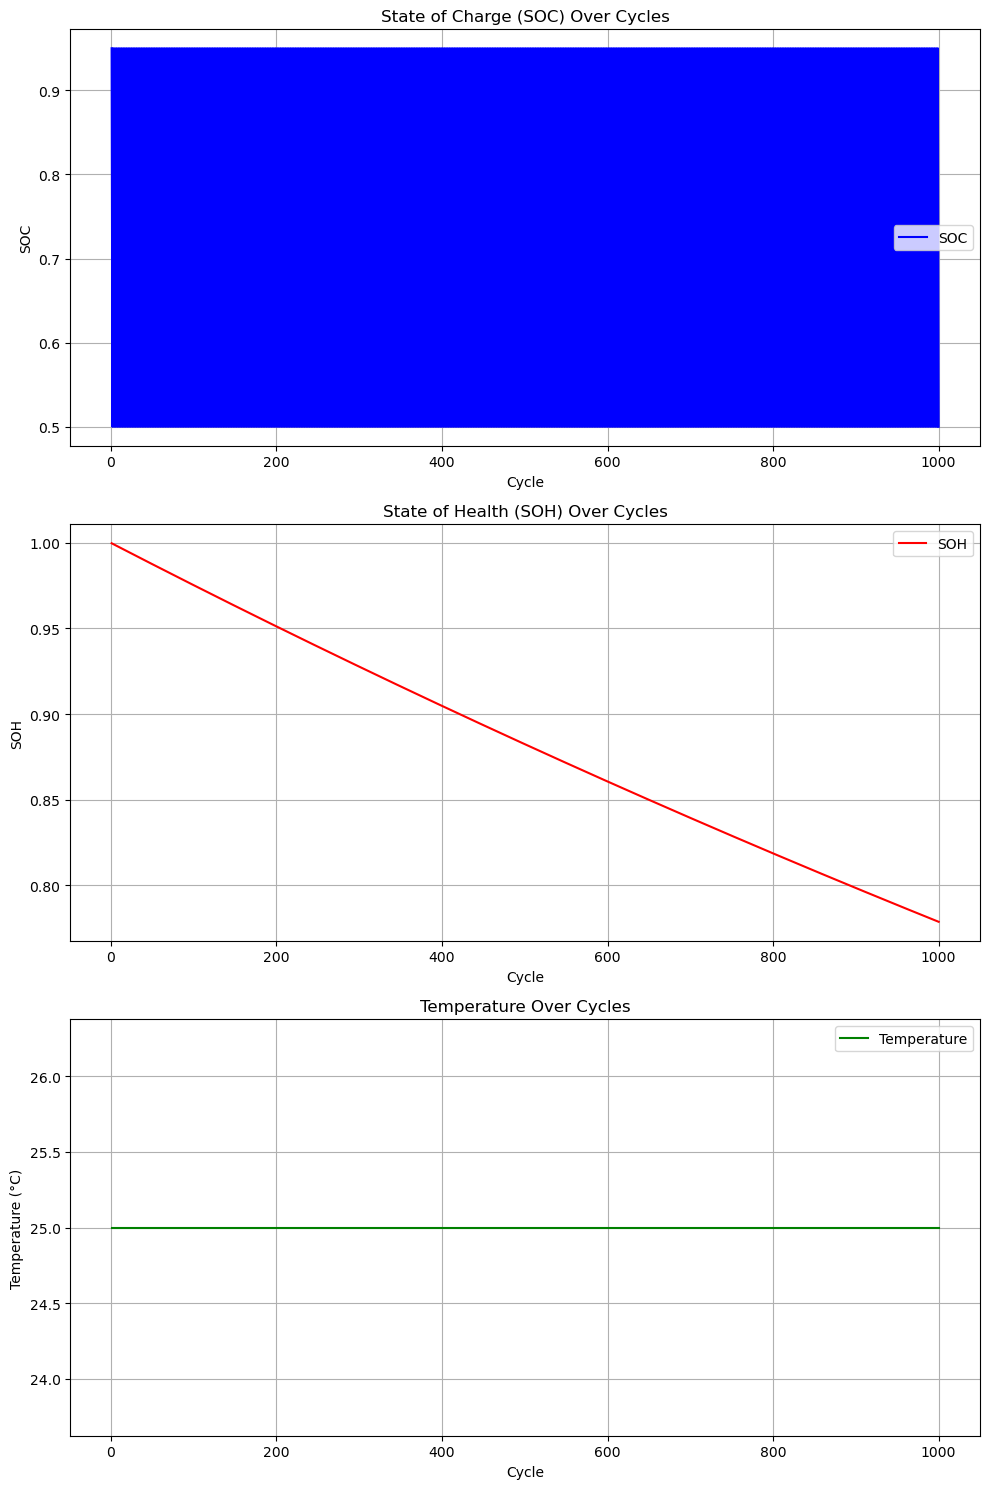

In [10]:
import matplotlib.pyplot as plt

# Plot SOC, SOH, and Temperature over cycles
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# State of Charge (SOC) Plot
axs[0].plot(data_df['Cycle'], data_df['soc'], color='blue', label='SOC')
axs[0].set_title('State of Charge (SOC) Over Cycles')
axs[0].set_xlabel('Cycle')
axs[0].set_ylabel('SOC')
axs[0].legend()
axs[0].grid(True)

# State of Health (SOH) Plot
axs[1].plot(data_df['Cycle'], data_df['soh'], color='red', label='SOH')
axs[1].set_title('State of Health (SOH) Over Cycles')
axs[1].set_xlabel('Cycle')
axs[1].set_ylabel('SOH')
axs[1].legend()
axs[1].grid(True)

# Temperature Plot
axs[2].plot(data_df['Cycle'], data_df['temperature'], color='green', label='Temperature')
axs[2].set_title('Temperature Over Cycles')
axs[2].set_xlabel('Cycle')
axs[2].set_ylabel('Temperature (°C)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [11]:
# Compute and display the correlation matrix to explore potential relationships between variables
correlation_matrix = data_df[['soc', 'soh', 'temperature']].corr()
print(correlation_matrix)


                  soc       soh  temperature
soc          1.000000  0.001733          NaN
soh          0.001733  1.000000          NaN
temperature       NaN       NaN          NaN
